# mlr3：模型比较

前面一篇介绍了性能评价，今天学习多个模型比较。



## benchmark

用于比较多个模型，比如多个模型在单个任务的表现、多个模型在多个任务的表现等，使用不同的预处理进行的多个模型的表现等！

首先创建一个design

`mlr3`通过design进行比较多个模型，这个design是包含`Task`、`Learner`、`Resampling`的组合。

In [1]:
library(mlr3verse)


Loading required package: mlr3



In [2]:
# 使用benchmark_grid函数创建
design <- benchmark_grid(
    tasks = tsks(c(
        "spam",
        "german_credit",
        "sonar"
    )),
    learners = lrns(
        c(
            "classif.ranger",
            "classif.rpart",
            "classif.featureless"
        ),
        predict_type = "prob"
    ),
    resamplings = rsmps(c("holdout", "cv"))
)
print(design)


Warning message:
“Package 'ranger' required but not installed for Learner 'classif.ranger'”


             task             learner resampling
           <char>              <char>     <char>
 1:          spam      classif.ranger    holdout
 2:          spam      classif.ranger         cv
 3:          spam       classif.rpart    holdout
 4:          spam       classif.rpart         cv
 5:          spam classif.featureless    holdout
 6:          spam classif.featureless         cv
 7: german_credit      classif.ranger    holdout
 8: german_credit      classif.ranger         cv
 9: german_credit       classif.rpart    holdout
10: german_credit       classif.rpart         cv
11: german_credit classif.featureless    holdout
12: german_credit classif.featureless         cv
13:         sonar      classif.ranger    holdout
14:         sonar      classif.ranger         cv
15:         sonar       classif.rpart    holdout
16:         sonar       classif.rpart         cv
17:         sonar classif.featureless    holdout
18:         sonar classif.featureless         cv


然后进行比较，也是1行代码即可！

In [4]:
bmr <- benchmark(design, store_models = T)
bmr


INFO  [06:53:28.493] [mlr3] Running benchmark with 99 resampling iterations
INFO  [06:53:28.498] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 1/1)
INFO  [06:53:30.050] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 1/10)
INFO  [06:53:31.125] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 2/10)
INFO  [06:53:32.197] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 3/10)
INFO  [06:53:33.399] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 4/10)
INFO  [06:53:34.457] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 5/10)
INFO  [06:53:35.686] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 6/10)
INFO  [06:53:36.767] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 7/10)
INFO  [06:53:37.845] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 8/10)
INFO  [06:53:39.129] [mlr3] Applying learner 'classif.ranger' on task 'spam' (iter 9/10)
INFO  [06:53:40.211] [mlr3] Applyin

<BenchmarkResult> of 99 rows with 18 resampling runs
 nr       task_id          learner_id resampling_id iters warnings errors
  1          spam      classif.ranger       holdout     1        0      0
  2          spam      classif.ranger            cv    10        0      0
  3          spam       classif.rpart       holdout     1        0      0
  4          spam       classif.rpart            cv    10        0      0
  5          spam classif.featureless       holdout     1        0      0
  6          spam classif.featureless            cv    10        0      0
  7 german_credit      classif.ranger       holdout     1        0      0
  8 german_credit      classif.ranger            cv    10        0      0
  9 german_credit       classif.rpart       holdout     1        0      0
 10 german_credit       classif.rpart            cv    10        0      0
 11 german_credit classif.featureless       holdout     1        0      0
 12 german_credit classif.featureless            cv    10  

In [6]:
ls(bmr)


[1] "aggregate"          "clone"              "combine"           
 [4] "discard"            "filter"             "format"            
 [7] "help"               "initialize"         "learners"          
[10] "marshal"            "n_resample_results" "print"             
[13] "resample_result"    "resample_results"   "resamplings"       
[16] "score"              "task_type"          "tasks"             
[19] "uhashes"            "unmarshal"

查看模型的表现，使用多种度量指标：

In [8]:
bmr$aggregate


function (measures = NULL, ids = TRUE, uhashes = FALSE, params = FALSE, 
    conditions = FALSE) 
.__BenchmarkResult__aggregate(self = self, private = private, 
    super = super, measures = measures, ids = ids, uhashes = uhashes, 
    params = params, conditions = conditions)
<environment: 0x55a481530008>

In [5]:
measures <- msrs(c("classif.acc", "classif.mcc"))

tab <- bmr$aggregate(measures)
print(tab)


       nr       task_id          learner_id resampling_id iters classif.acc
    <int>        <char>              <char>        <char> <int>       <num>
 1:     1          spam      classif.ranger       holdout     1   0.9556714
 2:     2          spam      classif.ranger            cv    10   0.9519645
 3:     3          spam       classif.rpart       holdout     1   0.9100391
 4:     4          spam       classif.rpart            cv    10   0.8928530
 5:     5          spam classif.featureless       holdout     1   0.6049544
 6:     6          spam classif.featureless            cv    10   0.6059577
 7:     7 german_credit      classif.ranger       holdout     1   0.6996997
 8:     8 german_credit      classif.ranger            cv    10   0.7730000
 9:     9 german_credit       classif.rpart       holdout     1   0.6816817
10:    10 german_credit       classif.rpart            cv    10   0.7510000
11:    11 german_credit classif.featureless       holdout     1   0.6366366
12:    12 ge

## 可视化结果

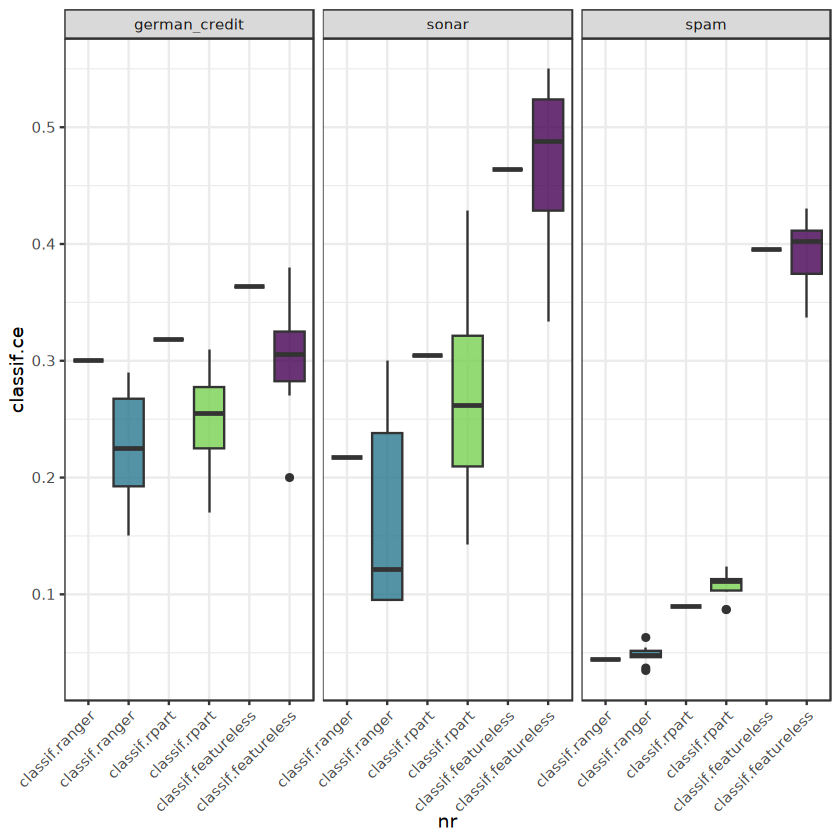

In [9]:
library(ggplot2)
autoplot(bmr) + theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


上面的图给出了多个模型在不同数据集中的平均表现，我们也可以查看多个模型在某一个特定数据集中的表现：

In [10]:
bmr$clone(deep = T)$filter


function (task_ids = NULL, task_hashes = NULL, learner_ids = NULL, 
    learner_hashes = NULL, resampling_ids = NULL, resampling_hashes = NULL) 
.__BenchmarkResult__filter(self = self, private = private, super = super, 
    task_ids = task_ids, task_hashes = task_hashes, learner_ids = learner_ids, 
    learner_hashes = learner_hashes, resampling_ids = resampling_ids, 
    resampling_hashes = resampling_hashes)
<environment: 0x55a485890398>

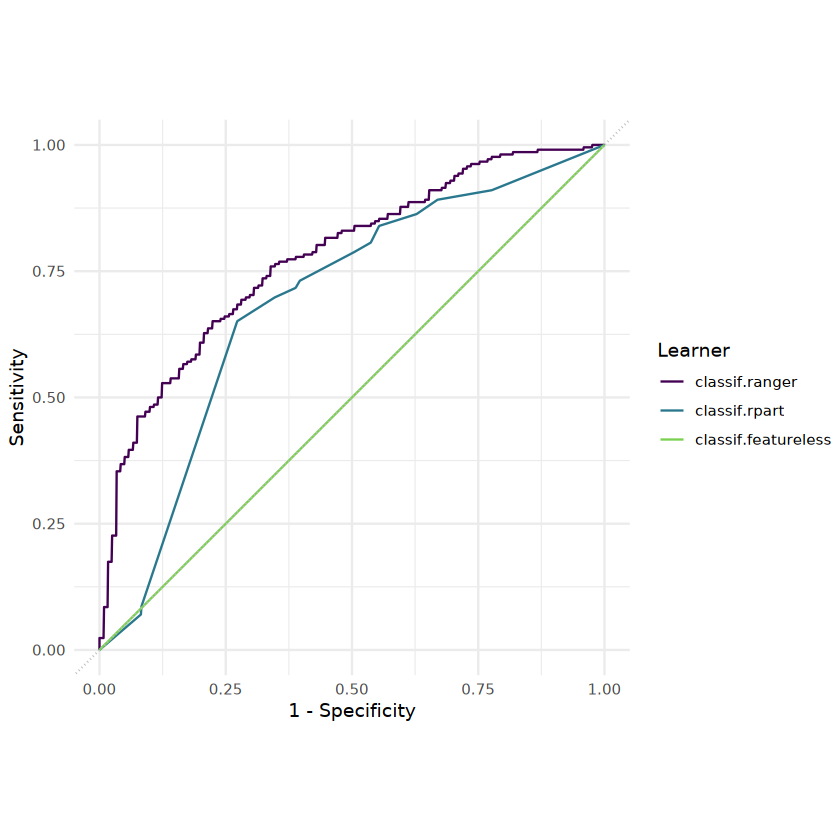

In [11]:
bmr_german <- bmr$clone(deep = T)$filter(
    task_ids = "german_credit",
    resampling_ids = "holdout"
)
autoplot(bmr_german, type = "roc")


当然也可以只提取其中一个结果：

In [14]:
tab <- bmr$aggregate(measures)

tab


nr,resample_result,task_id,learner_id,resampling_id,iters,classif.acc,classif.mcc
<int>,<list>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,<environment: 0x55a48a85fea8>,spam,classif.ranger,holdout,1,0.9556714,0.9070822
2,<environment: 0x55a48ae26440>,spam,classif.ranger,cv,10,0.9519645,0.8989503
3,<environment: 0x55a48aee8c18>,spam,classif.rpart,holdout,1,0.9100391,0.8108830
4,<environment: 0x55a48b452dc0>,spam,classif.rpart,cv,10,0.8928530,0.7741970
5,<environment: 0x55a48b78a928>,spam,classif.featureless,holdout,1,0.6049544,0.0000000
6,<environment: 0x55a48ba35ad0>,spam,classif.featureless,cv,10,0.6059577,0.0000000
7,<environment: 0x55a48baf3658>,german_credit,classif.ranger,holdout,1,0.6996997,0.3046135
8,<environment: 0x55a48bde6380>,german_credit,classif.ranger,cv,10,0.7730000,0.4021577
9,<environment: 0x55a48be96bd8>,german_credit,classif.rpart,holdout,1,0.6816817,0.2851927


In [15]:
rr <- tab[task_id == "german_credit" &
    learner_id == "classif.ranger"]$resample_result[[1]]
print(rr)


<ResampleResult> with 1 resampling iterations
       task_id     learner_id resampling_id iteration warnings errors
 german_credit classif.ranger       holdout         1        0      0


In [28]:
as.data.table(rr)


task,learner,resampling,iteration,prediction
<list>,<list>,<list>,<int>,<list>
<environment: 0x55a45f6abca8>,<environment: 0x55a49aee1da8>,<environment: 0x55a45dd57c18>,1,<environment: 0x55a49ec2c1b0>


查看一个结果的表现：

In [29]:
rr$aggregate(msr("classif.auc"))


classif.auc 
  0.7772104

合并多个`BenchmarkResult`，比如在2台电脑上做了2个不同的benchmarks，可以直接合并成一个更大的对象：

In [30]:
task <- tsk("iris")
resampling <- rsmp("holdout")$instantiate(task)

rr1 <- resample(task, lrn("classif.rpart"), resampling)
## INFO  [20:47:40.585] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 1/1)
rr2 <- resample(task, lrn("classif.featureless"), resampling)
## INFO  [20:47:40.606] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 1/1)

# 通过以下代码合并结果
bmr1 <- as_benchmark_result(rr1)
bmr2 <- as_benchmark_result(rr2)

bmr1$combine(bmr2)

bmr1


INFO  [07:31:27.090] [mlr3] Applying learner 'classif.rpart' on task 'iris' (iter 1/1)
INFO  [07:31:27.111] [mlr3] Applying learner 'classif.featureless' on task 'iris' (iter 1/1)


<BenchmarkResult> of 2 rows with 2 resampling runs
 nr task_id          learner_id resampling_id iters warnings errors
  1    iris       classif.rpart       holdout     1        0      0
  2    iris classif.featureless       holdout     1        0      0